# EDA Analysis and Visualization of COVID-19 Data

The exercesice consists in using the updated Data from COVID-19 posted by Our World in Data website, and answer two questions:

1. Plot two separate charts of infected people and deaths in Spain (in two separate graphs)
2. Plot two separate bar charts, showing the Top-10 countries in terms of number of infection cases and deaths (separately)

Data Source: https://ourworldindata.org/coronavirus-source-data

* Note: EXPLAIN THE SOURCE OF DATA ----- CONFLICTS BETWEEN ECDC AND WHO DATA

## First steps: Importing and describing Data

In [85]:
# Import the necessary libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Import dataset:

df = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv', parse_dates=["date"])
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
6089,2020-03-21,World,28891,1367,271364,11252
6090,2020-03-19,Zambia,2,0,2,0
6091,2020-03-20,Zambia,0,0,2,0
6092,2020-03-21,Zambia,0,0,2,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 6 columns):
date            6094 non-null datetime64[ns]
location        6094 non-null object
new_cases       6094 non-null int64
new_deaths      6094 non-null int64
total_cases     6094 non-null int64
total_deaths    6094 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 285.8+ KB


In [88]:
df.set_index("date")

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...
2020-03-21,World,28891,1367,271364,11252
2020-03-19,Zambia,2,0,2,0
2020-03-20,Zambia,0,0,2,0


### First insights:

From this first step we can see that the file is a Time Series tidy format dataset containing data of the evolution of certain variables related to COVID-19 spread in different countries. After inspecting the variables, we set the column 'Date' as index. Let's examine the variables:

- **date**: Date of the observation taken, ranging from 2019/12/31 to the last day the dataset has been updated. Date formar _(yyyy-mm-dd)_.
- **location**: List of countries with available data, plus global data under the location _'World'_
- **new_cases**: amount of new cases reported on that date
- **new_deaths**: amount of new deaths reported on that date
- **total_cases**: total cases since the start of the outbreak
- **total_deaths**: total deaths since the start of the outbreak

Let's see what's going on with missing values:

## 1. Spain: Infections and Deaths

First, let's filter data related to Spain and set the column 'date' as the Index.

In [89]:
df_spain = df[df.location == "Spain"]
df_spain.set_index("date")
df_spain

,date,location,new_cases,new_deaths,total_cases,total_deaths
5121,2019-12-31,Spain,0,0,0,0
5122,2020-01-01,Spain,0,0,0,0
5123,2020-01-02,Spain,0,0,0,0
5124,2020-01-03,Spain,0,0,0,0
5125,2020-01-04,Spain,0,0,0,0
...,...,...,...,...,...,...
5198,2020-03-17,Spain,1438,21,9191,309
5199,2020-03-18,Spain,1987,182,11178,491
5200,2020-03-19,Spain,2538,107,13716,598
5201,2020-03-20,Spain,3431,169,17147,767


In [90]:
df_spain.set_index("date", inplace=True)
df_spain

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Spain,0,0,0,0
2020-01-01,Spain,0,0,0,0
2020-01-02,Spain,0,0,0,0
2020-01-03,Spain,0,0,0,0
2020-01-04,Spain,0,0,0,0
...,...,...,...,...,...
2020-03-17,Spain,1438,21,9191,309
2020-03-18,Spain,1987,182,11178,491
2020-03-19,Spain,2538,107,13716,598


#### Checking for missing values in subset and observing data:

Doing a quick check we can see there are no _null_ values, and the amount of observations are complete.

In [91]:
df.index.isnull().any()

False

In [92]:
df.location.isnull().values.any()

False

In [93]:
df_spain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2019-12-31 to 2020-03-21
Data columns (total 5 columns):
location        82 non-null object
new_cases       82 non-null int64
new_deaths      82 non-null int64
total_cases     82 non-null int64
total_deaths    82 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.8+ KB


### Curve of Daily New Cases in Spain

We will first plot the curve of _New Cases_ in order to see the evolution of the virus spread since the beginning of the outbreak.

In the chart bellow, the _**red line**_ marks Sunday March 8th which seems to be the beginning of the steep curve. The _**blue line**_ represents the beginning of the Official measures to control spread put in place on March 16th.

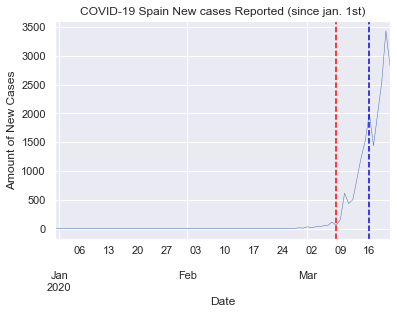

In [94]:
sns.set(rc={'figure.figsize':(6, 4)})

df_spain['new_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain New cases Reported (since jan. 1st)')
plt.xlabel('Date')
plt.ylabel('Amount of New Cases')
plt.axvline('2020-03-16', color='blue', linestyle='--')
plt.axvline('2020-03-08', color='red', linestyle='--')

plt.show()


### Curves of Total Cases and Total Deaths in Spain

The charts bellow show the curves of Total Cases reported in Spain and Total Deaths since the beginning of the outbreak. Please note the difference in the _y axis_.
<br>
<br>
As we saw in the previous chart, it is by the first week in March when the curves start to grow. Again, the _**red line**_ shows the beginning of the measures. Next steps will be to plot the evolution in logaritmic.

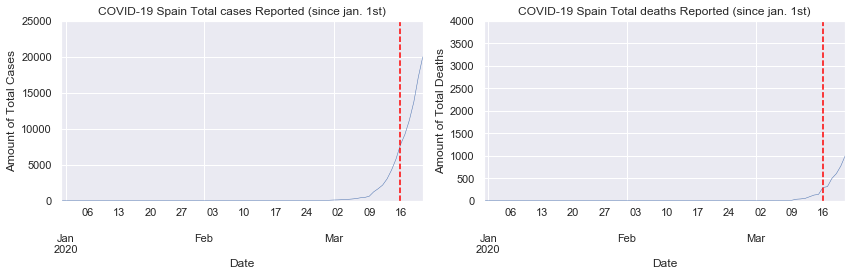

In [95]:
sns.set(rc={'figure.figsize':(12, 4)})

plt.subplot(1, 2, 1)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (since jan. 1st)')
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.ylim(0,25000)

plt.subplot(1, 2, 2)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (since jan. 1st)')
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.ylim(0,4000)

plt.tight_layout()

plt.show()

## 2. World: Top-10 countries in terms of Infections and Deaths

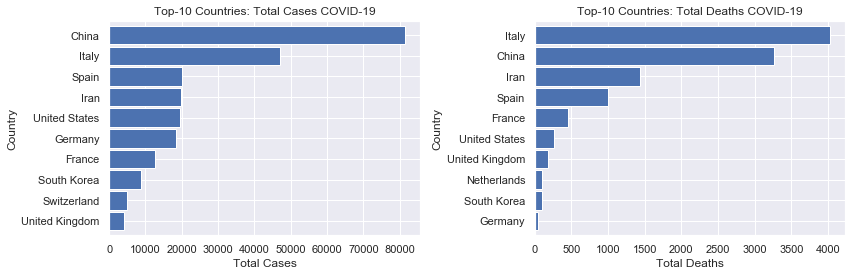

In [145]:
sns.set(rc={'figure.figsize':(12, 4)})

plt.subplot(1, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(10)
top_ten_total_cases.plot(kind='barh', width=0.9)
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Top-10 Countries: Total Cases COVID-19')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(10)
top_ten_total_deaths.plot(kind='barh', width=0.9)
plt.ylabel('Country')
plt.xlabel('Total Deaths')
plt.title('Top-10 Countries: Total Deaths COVID-19')
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()